# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

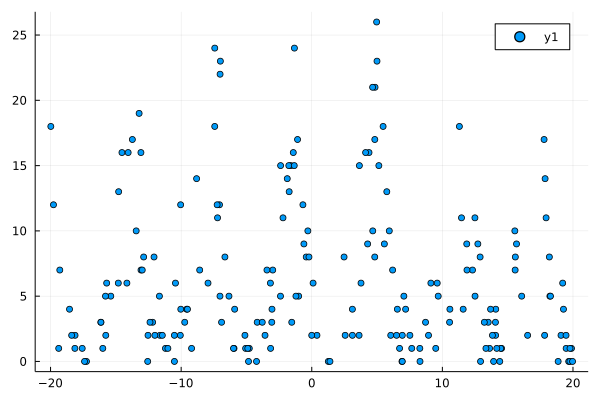

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:03
  iter:  20
  ELBO:  -569.3612289537508
[ Info: Training ended after 20 iterations. Total number of iterations 20
  4.158148 seconds (7.10 M allocations: 458.393 MiB, 10.01% gc time, 97.33% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.8836658323607202, 0.5493709804628503, 0.28407052099268515, 0.5475967917481289, 0.4289336239613931, 0.16594014963568457, 0.7055440527256882, 0.1656772133616321, 0.593176536754653, 0.5481484428182051  …  0.1733137400538636, 0.8295242528843754, 0.2651775249920969, 0.19526795412176717, 0.31908205502406284, 0.26675438936119966, 0.2859769890239095, 0.16912221178086354, 0.8141943094876224, 0.3135233040874096], θ = [2.349092696137398, 14.145995102226864, 5.959974925138838, 3.9029548987297233, 10.341921705773323, 4.489702304968098, 2.88144976040178, 3.990875398901307, 9.716746999881316, 4.3906105974194585  …  5.486273970903443, 2.3658660433316046, 3.9767239548227837, 3.4889211156743127, 2.974803166900046, 4.47350430774319, 5.95944025769282, 6.484551260780996, 2.3704730317086296, 3.471609122650919]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTupl

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -728.791301178109
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.705217 seconds (4.69 M allocations: 334.569 MiB, 5.18% gc time, 93.47% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.27795419898837) infered by Analytic Variational Inference , (local_vars = (c = [1.003340731404593, 0.521090742935875, 0.17210111758197563, 0.7698039891735734, 0.35642190834995646, 0.25920694999762794, 0.8717870902377974, 0.2665335020466771, 0.5764922233008533, 0.7692120174911546  …  0.317373456179141, 0.9555301234061243, 0.45848470084566945, 0.16566077663422502, 0.5269242762021779, 0.29318203180204355, 0.16675629052477112, 0.27767079048259313, 0.9430207175859321, 0.5337305955422428], θ = [4.746698337881458, 14.359446572480207, 6.9096952495836765, 6.053830326580254, 10.882830478473766, 5.9043199992594255, 5.162951133937409, 5.421204017896797, 9.81171769481976, 6.529611682754135  …  6.9987579722731565, 4.690229619419052, 5.715327830432516, 4.677797786257597, 4.825876704428014, 5.803494156667579, 6.862915640268748, 7.923176904845581, 4.7208400343581, 5.321821719694458], γ = [10.276757777233303, 5.365821140458076, 6.8534831471

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

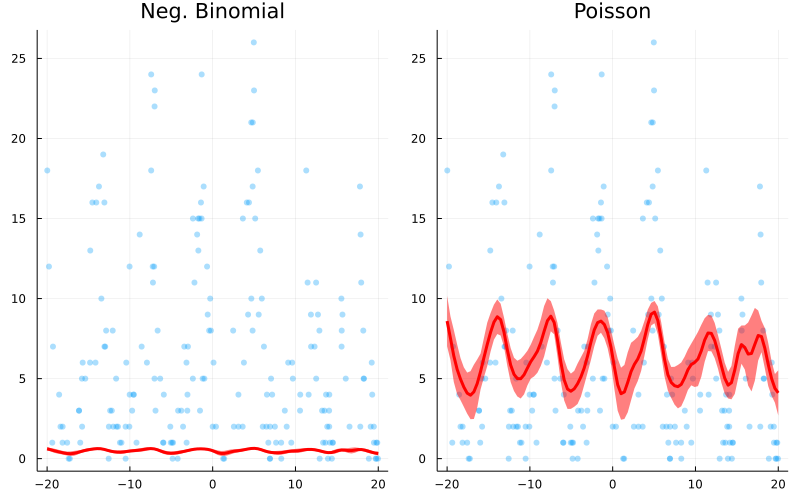

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*